<div style="text-align:center; font-family: Times New Roman, serif;">
<span style="color:Orange; font-family: Times New Roman, serif; font-weight: bold;">
<span class="cm-header cm-header-1">
Client: ABC Tech<br>
   </span>
</div>

-  ABC Tech management recently attended Machine Learning conference on ML for ITSM.  Machine learning looks prospective to improve ITSM processes through prediction and automation. They came up with 4 key areas, where ML can help ITSM process in ABC Tech.

-  ITSM (Information Technology Service Management) is a set of processes and activities for managing and delivering IT services to meet business needs. ITSM involves different areas such as incident management, change management, problem management, and service level management.



## Problem Statement

-  Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so that they can take preventive measures or fix the problem before it surfaces. 
-  Forecast the incident volume in different fields , quarterly and annual. So that they can be better prepared with  resources and technology planning.
-  Auto tag the tickets with right priorities and right departments so that reassigning and related delay can be reduced.
-  Predict RFC (Request for change) and possible failure / misconfiguration of ITSM assets.
    

In [4]:
!pip install mysql-connector-python


Defaulting to user installation because normal site-packages is not writeable


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import mysql.connector

### Fetching Data from MYSQL

-  Connect with SQL and download data
-  Only User ID, password is provided, therefore, we have to first connect to db server, get list of DBs,
-  Then connect to required DB, get list of tables,
-  Finally connect to data to read the data


-  Connect with SQL and download data


In [6]:
# Connect with SQL and download data
host='18.136.157.135'
username='dm_team'
password='DM!$Team@&27920!'
conn=mysql.connector.connect(host='18.136.157.135',user='dm_team',password='DM!$Team@&27920!')

-  Only User ID, password is provided, therefore, we have to first connect to db server, get list of DBs,


In [7]:
cursor=conn.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)


('information_schema',)
('project_itsm',)


-  Then connect to required DB, get list of tables,


In [8]:
conn=mysql.connector.connect(host='18.136.157.135',user='dm_team',password='DM!$Team@&27920!',
                           database='project_itsm')

-  Finally connect to data to read the data


In [9]:
db_tables=pd.read_sql_query('show tables',conn)# weite connection becoz we have connected to db and that is stored in connection
print(db_tables)

  Tables_in_project_itsm
0           dataset_list


In [10]:
query='select * from dataset_list'
data=pd.read_sql(query,conn)
pd.set_option('display.max_columns',None)
data

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,incident,KM0000553,closed,26,05-02-2012 13:32,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,incident,KM0000611,closed,33,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,request for information,KM0000339,closed,3,29-03-2012 12:36,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,incident,KM0000611,closed,13,17-07-2012 11:49,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,incident,KM0000611,closed,2,10-08-2012 11:01,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4,0.23189604,incident,KM0001314,closed,0,31-03-2014 16:23,,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1,SD0147021,,,
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4,0.805153085,incident,KM0002360,closed,0,31-03-2014 15:03,,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1,SD0146967,,,
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5,0.917466294,incident,KM0000315,closed,0,31-03-2014 15:28,,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1,SD0146982,,,
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4,0.701278158,incident,KM0001287,closed,0,31-03-2014 15:35,,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1,SD0146986,,,


### Basic Checks

In [11]:
list(data.columns)

['CI_Name',
 'CI_Cat',
 'CI_Subcat',
 'WBS',
 'Incident_ID',
 'Status',
 'Impact',
 'Urgency',
 'Priority',
 'number_cnt',
 'Category',
 'KB_number',
 'Alert_Status',
 'No_of_Reassignments',
 'Open_Time',
 'Reopen_Time',
 'Resolved_Time',
 'Close_Time',
 'Handle_Time_hrs',
 'Closure_Code',
 'No_of_Related_Interactions',
 'Related_Interaction',
 'No_of_Related_Incidents',
 'No_of_Related_Changes',
 'Related_Change']

In [12]:
data.shape

(46606, 25)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CI_Name                     46606 non-null  object
 1   CI_Cat                      46606 non-null  object
 2   CI_Subcat                   46606 non-null  object
 3   WBS                         46606 non-null  object
 4   Incident_ID                 46606 non-null  object
 5   Status                      46606 non-null  object
 6   Impact                      46606 non-null  object
 7   Urgency                     46606 non-null  object
 8   Priority                    46606 non-null  object
 9   number_cnt                  46606 non-null  object
 10  Category                    46606 non-null  object
 11  KB_number                   46606 non-null  object
 12  Alert_Status                46606 non-null  object
 13  No_of_Reassignments         46606 non-null  ob

In [14]:
data.describe()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
count,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606
unique,3019,13,65,274,46606,2,6,6,6,46606,4,1825,1,42,34636,2245,33628,34528,30639,15,50,43060,25,5,233
top,SUB000456,application,Server Based Application,WBS000073,IM0000004,Closed,4,4,4,0.601292279,incident,KM0001106,closed,0,24-03-2014 08:54,,,02-10-2013 15:20,0,Other,1,#MULTIVALUE,,,
freq,3050,32900,18811,13342,1,46597,22556,22588,22717,1,37748,1106,46606,27468,7,44322,1780,21,236,16470,43058,3434,45384,46046,46046


In [15]:
data.describe(include='O')

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
count,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606
unique,3019,13,65,274,46606,2,6,6,6,46606,4,1825,1,42,34636,2245,33628,34528,30639,15,50,43060,25,5,233
top,SUB000456,application,Server Based Application,WBS000073,IM0000004,Closed,4,4,4,0.601292279,incident,KM0001106,closed,0,24-03-2014 08:54,,,02-10-2013 15:20,0,Other,1,#MULTIVALUE,,,
freq,3050,32900,18811,13342,1,46597,22556,22588,22717,1,37748,1106,46606,27468,7,44322,1780,21,236,16470,43058,3434,45384,46046,46046


-  Delete the columns / Rows that are not relevant to the project 
-  Based on domain analysis, we are listing the columns that are required for raising the tickets

### Domain Analysis

- CI_Name: Configuration Item Name. This could be a specific piece of hardware, software, or service related to the incident.
-  CI_Cat: Configuration Item Category. The category of the configuration item, such as hardware, software, or network.
-  CI_Subcat: Configuration Item Subcategory. A more specific classification of the configuration item within its category.
-  WBS: Work Breakdown Structure. A unique code or identifier for a project or task related to the incident.
-  Incident_ID: A unique identifier for each incident.
-  Status: The current status of the incident, such as open, in progress, or resolved.
-  Impact: The extent of the incident's effect on the organization or users.
-  Urgency: The importance of resolving the incident quickly.
-  Priority: A calculated priority level based on impact and urgency.
-  number_cnt: Possibly a count or identifier for the incident number.
-  Category: The type of issue or problem, such as a software bug or hardware failure.
-  KB_number: Knowledge Base number, which might reference a solution or documentation related to the incident.
-  Alert_Status: The current status of an alert related to the incident.
-  No_of_Reassignments: The number of times the incident has been reassigned to different support staff or teams.
-  Open_Time: The timestamp when the incident was opened or reported.
-  Reopen_Time: The timestamp when the incident was reopened after being previously resolved.
-  Resolved_Time: The timestamp when the incident was resolved.
-  Close_Time: The timestamp when the incident was closed.
-  Handle_Time_hrs: The total time taken to handle the incident, typically measured in hours.
-  Closure_Code: A code indicating the reason for the incident closure, such as a successful resolution or a duplicate incident.
-  No_of_Related_Interactions: The number of related interactions or communications associated with the incident.
-  Related_Interaction: A reference to a specific related interaction.
-  No_of_Related_Incidents: The number of incidents related to the current incident.
- No_of_Related_Changes: The number of related changes or updates made in response to the incident.
-  Related_Change: A reference to a specific related change or update.
-  These columns provide a detailed view of incident management, making it easier to track and resolve incidents, and identify areas for improvement.

## EDA

### Univariant analysis

In [16]:
data.Priority.value_counts()

4     22717
5     16486
3      5323
NA     1380
2       697
1         3
Name: Priority, dtype: int64

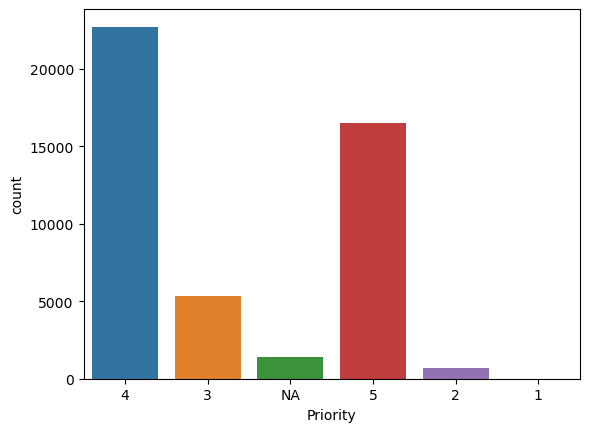

In [17]:
sns.countplot(data.Priority)
plt.show()

-  As from the above graph it is shown that many vales are under Priority 4.
-  ony 3 values are present in Priority 1.

In [18]:
a=data[['CI_Cat','Status','Impact','Urgency','Category','Alert_Status','No_of_Related_Changes']]

In [19]:
a

,CI_Cat,Status,Impact,Urgency,Category,Alert_Status,No_of_Related_Changes
0,subapplication,Closed,4,4,incident,closed,
1,application,Closed,3,3,incident,closed,
2,application,Closed,NS,3,request for information,closed,
3,application,Closed,4,4,incident,closed,
4,application,Closed,4,4,incident,closed,
...,...,...,...,...,...,...,...
46601,application,Closed,4,4,incident,closed,
46602,application,Closed,4,4,incident,closed,
46603,computer,Closed,5,5,incident,closed,
46604,application,Closed,4,4,incident,closed,


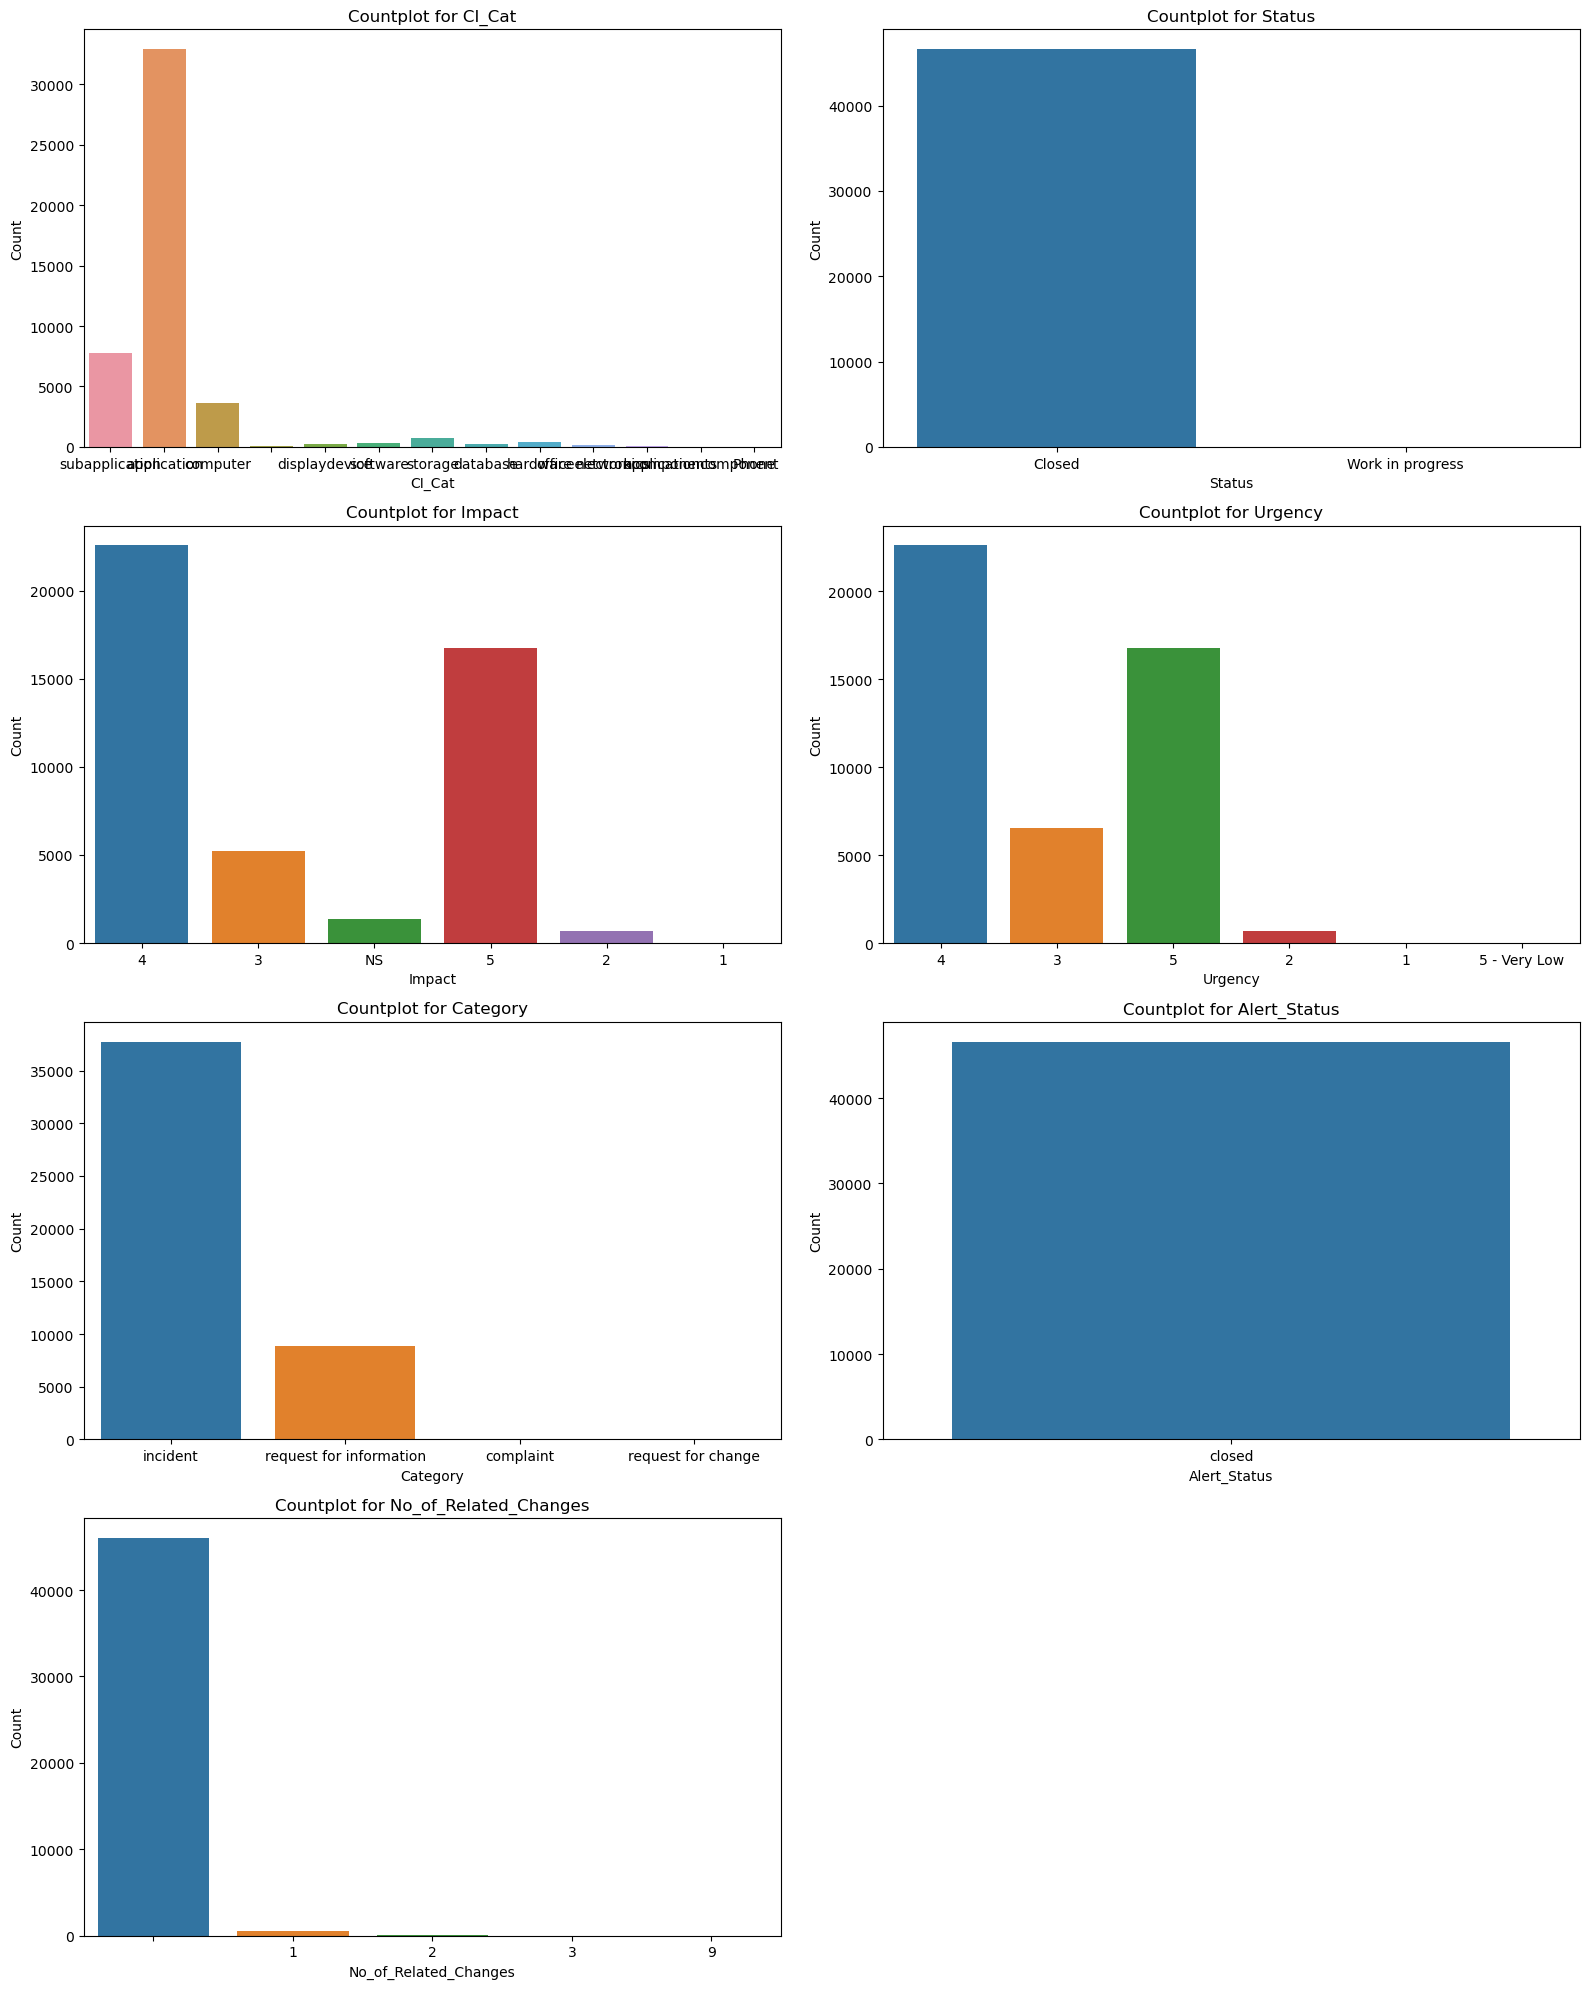

In [20]:
plt.figure(figsize=(16, 20))

for i, feature in enumerate(a):
    plt.subplot(4, 2, i+1)
    sns.countplot(x=feature, data=data)
    plt.title(f"Countplot for {feature}")
    plt.ylabel("Count")

plt.tight_layout()


-  In category column, as we can see only incidents and request for information are present.
-  In status and Alert status has only closed tickets, means all tickets are resolved.
-  Imapct and Urgency are dominant by only 4 and 5 tickets.
-  In category there are more applications .

-  68% belong to application and 18% belong to subapplication category.


In [21]:
b = data[['Closure_Code','No_of_Reassignments', 'No_of_Related_Incidents','No_of_Related_Interactions']]
b

,Closure_Code,No_of_Reassignments,No_of_Related_Incidents,No_of_Related_Interactions
0,Other,26,2,1
1,Software,33,1,1
2,No error - works as designed,3,,1
3,Operator error,13,,1
4,Other,2,,1
...,...,...,...,...
46601,Other,0,,1
46602,User error,0,,1
46603,Hardware,0,,1
46604,Software,0,,1


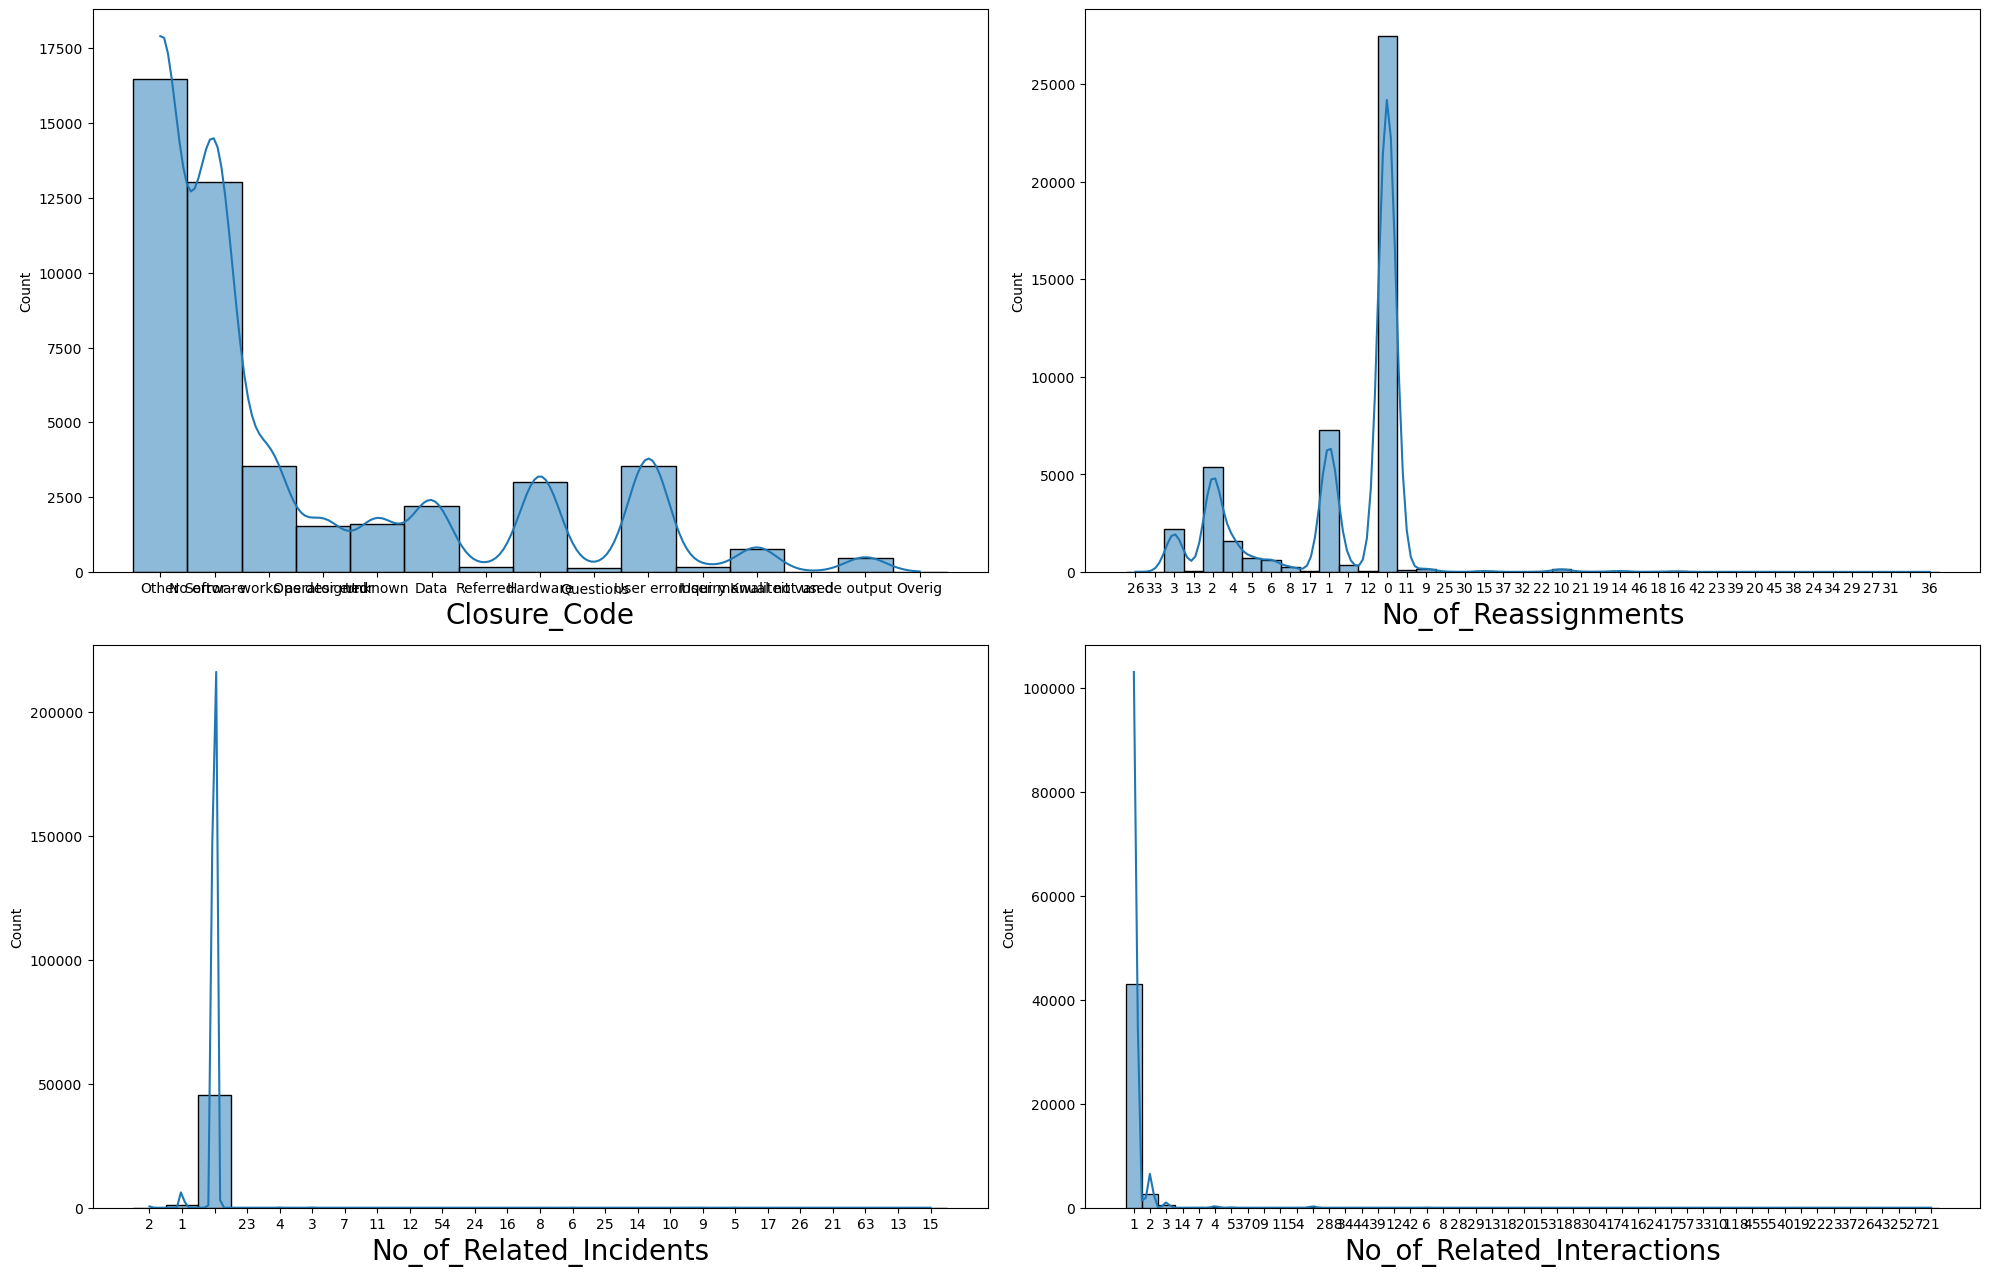

In [22]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in b:
        plt.subplot(4,2,plotnumber)
        sns.histplot(x=b[column].dropna(axis=0),bins=15,kde=True)
        plt.xlabel(column,fontsize=20)
        plotnumber+=1   
plt.tight_layout()

-  Almost all the data is showing skewness in the above graphs.


### Bivariant Analysis

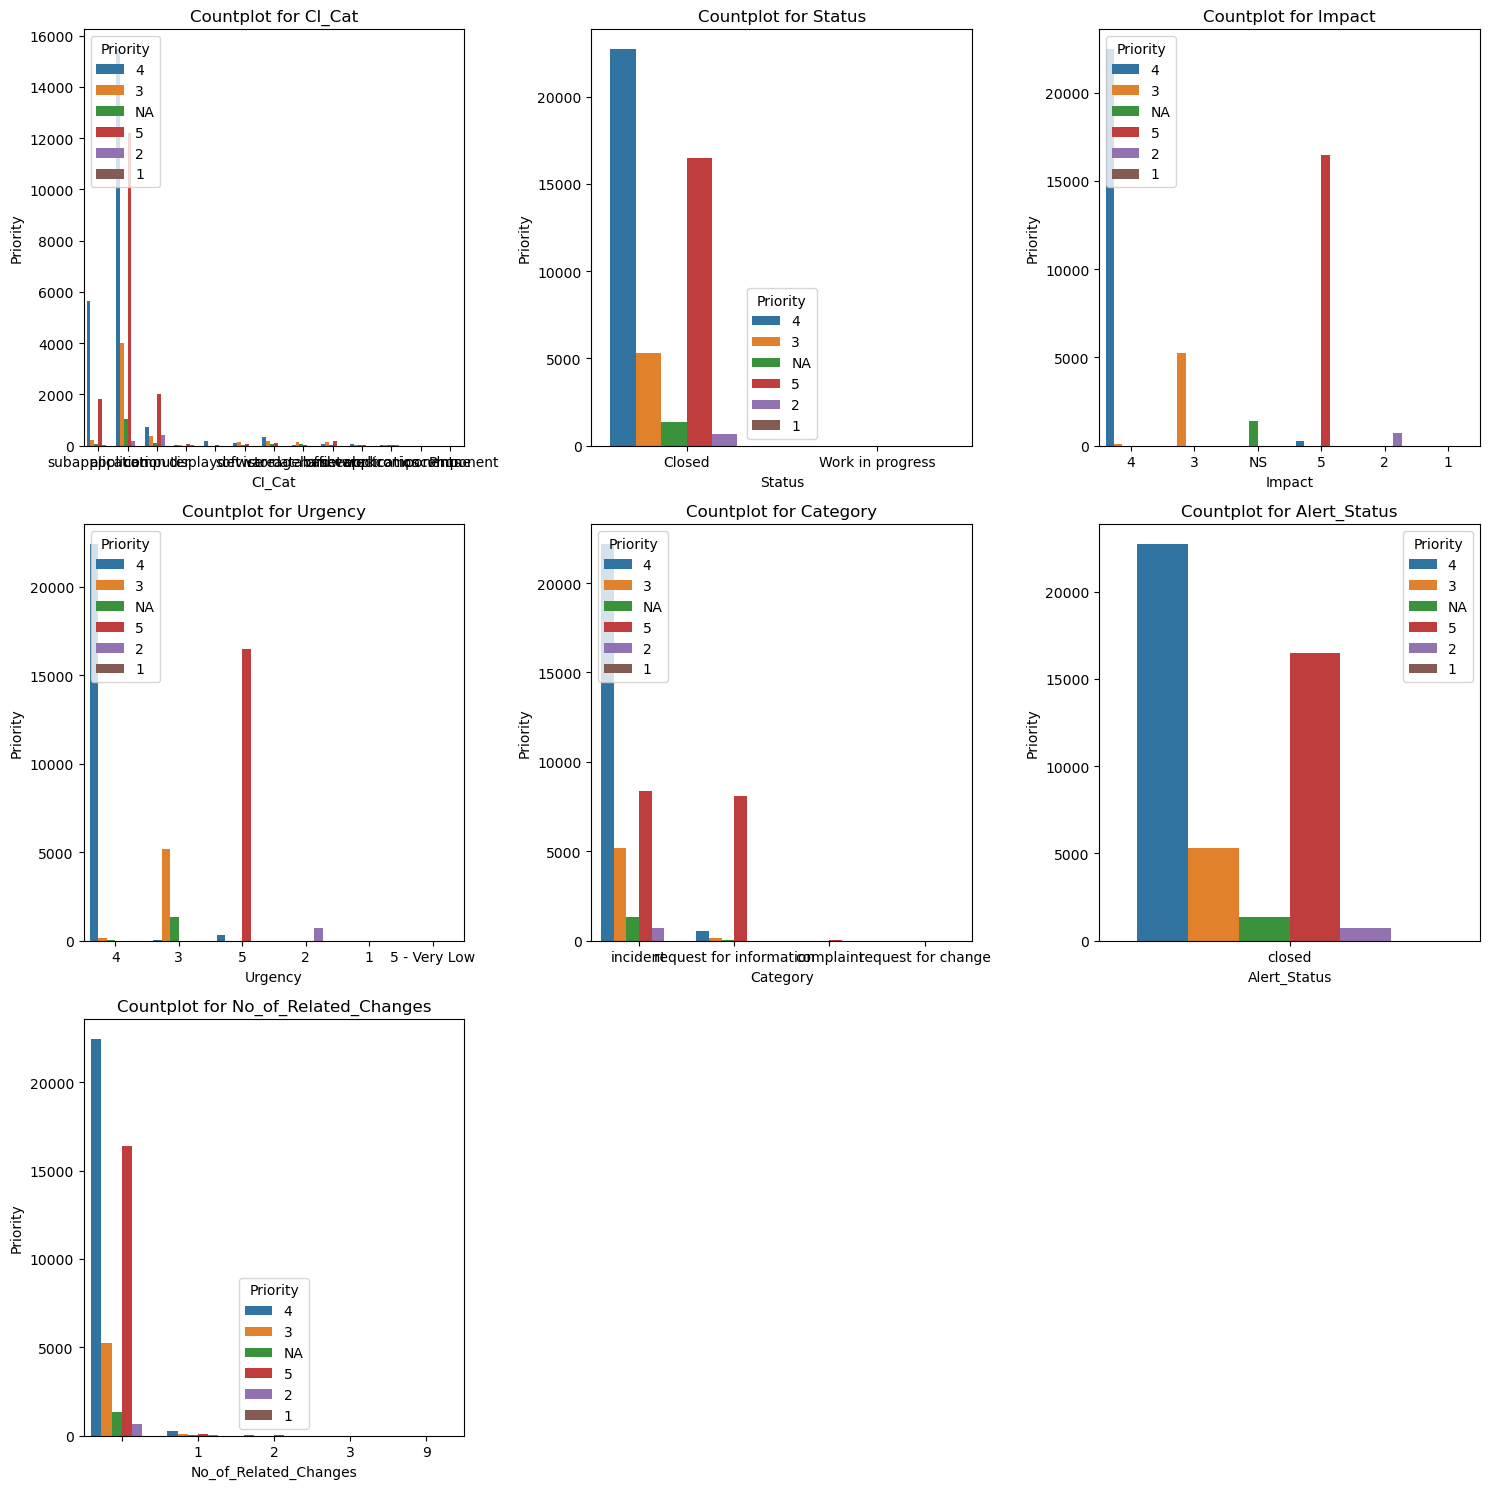

In [23]:
plt.figure(figsize=(15, 15))

for i, feature in enumerate(a):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=feature, hue='Priority', data=data)
    plt.title(f"Countplot for {feature}")
    plt.ylabel("Priority")

plt.tight_layout()

-  All P1s belong to the same category - application, subapp. P2 are a spread across


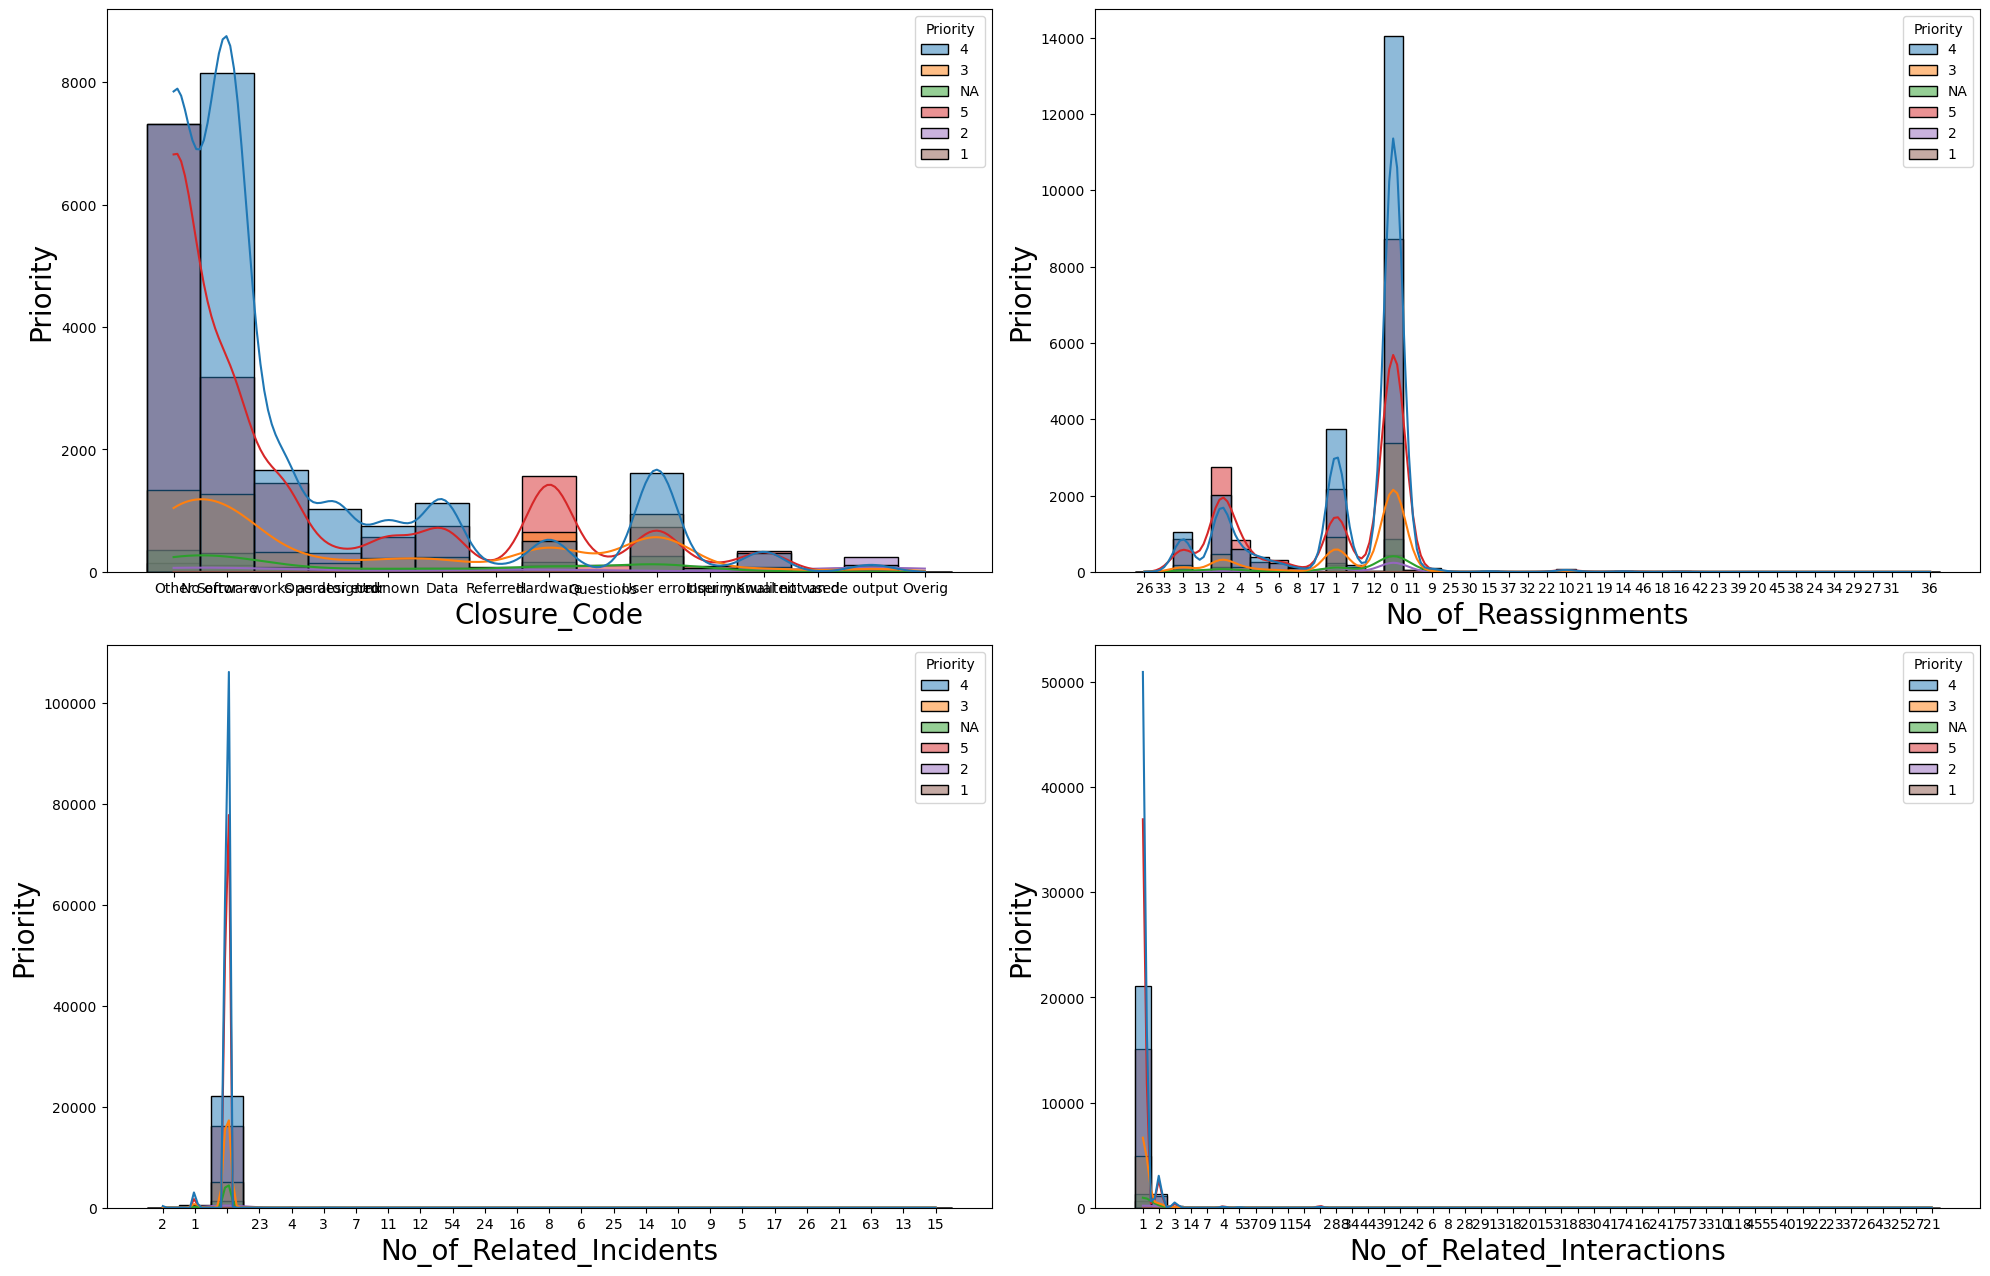

In [24]:
plt.figure(figsize=(20,25), facecolor='white') 
plotnumber = 1 

for column in b:
        ax = plt.subplot(4,2,plotnumber)
        sns.histplot(x=b[column].dropna(axis=0),hue=data.Priority,bins=15,kde=True)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Priority',fontsize=20)
        plotnumber+=1
plt.tight_layout()

-  Predominant reason for closure across P1-P5 is Hardware,Other,software
-  P1 and P2 had very less Reassignments as compared to P3-P5. Its obvious due result due to SLA misses.
-  No. Of Hands offs in P2 is relatively Higher.
-  Alomost All P1/P2 have related incidents in past
-  No. of interatciosn are less in P1 and its increases as priority increases


In [25]:
df=data.copy()

## 1. Predicting High Priority Tickets

-  Whether is ticket is open or closed. All tickets are closed, so this attribute in inconsequential It’s the no. of Hands offs between Resolution Agents before the issue gets resolved. Its could be an indicator for Priority. Generally High priority tickets should have less hand-offs to other agent.

In [26]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,roc_curve,precision_score,recall_score,f1_score,confusion_matrix

##### Only the features which are available when the tickets arrives can be used to predict priority. Therefore, we have used only 4 predictors.



### Feature selection

In [27]:
data1=data.loc[:,['CI_Cat','CI_Subcat','WBS','Category','Priority']]

In [28]:
data1.head()

,CI_Cat,CI_Subcat,WBS,Category,Priority
0,subapplication,Web Based Application,WBS000162,incident,4
1,application,Web Based Application,WBS000088,incident,3
2,application,Desktop Application,WBS000092,request for information,NA
3,application,Web Based Application,WBS000088,incident,4
4,application,Web Based Application,WBS000088,incident,4


In [29]:
data1.isnull().sum()

CI_Cat       0
CI_Subcat    0
WBS          0
Category     0
Priority     0
dtype: int64

-  there are no null values.

In [30]:
data1.CI_Cat.value_counts()

application             32900
subapplication           7782
computer                 3643
storage                   703
hardware                  442
software                  333
database                  214
displaydevice             212
officeelectronics         152
                          111
networkcomponents         107
applicationcomponent        5
Phone                       2
Name: CI_Cat, dtype: int64

In [31]:
data1.CI_Subcat.value_counts()

Server Based Application    18811
Web Based Application       15311
Desktop Application          3876
Laptop                       1921
SAP                          1199
                            ...  
Security Software               1
Application Server              1
NonStop Storage                 1
Protocol                        1
Neoview Server                  1
Name: CI_Subcat, Length: 65, dtype: int64

In [32]:
data1.WBS.value_counts()

WBS000073    13342
WBS000091     2500
WBS000263     2283
WBS000072     2197
WBS000271     1186
             ...  
WBS000214        1
WBS000119        1
WBS000117        1
WBS000282        1
WBS000105        1
Name: WBS, Length: 274, dtype: int64

In [33]:
data1.Category.value_counts()

incident                   37748
request for information     8846
complaint                     11
request for change             1
Name: Category, dtype: int64

In [34]:
data1.Priority.value_counts()

4     22717
5     16486
3      5323
NA     1380
2       697
1         3
Name: Priority, dtype: int64

-   Remove all (priority='NA') labeled records as there is no way to ascertain them as well.


In [35]:
print('count of priority being NA:',data1[data1.Priority == 'NA'].Priority.count())
data1 = data1[data1.Priority != 'NA']
print('count of priority post deletion of NA:',data1[data1.Priority == 'NA'].Priority.count())
print(data1.shape)


count of priority being NA: 1380
count of priority post deletion of NA: 0
(45226, 5)


In [36]:
data1.shape

(45226, 5)

-  CI Category & CI Subcategory had a lot of labels which were replaced to only take the major ones. Unknown values were replaced by Mode values.



In [37]:
data1.replace({'CI_Cat':{'applicationcomponent':'computer',
                           'displaydevice':'hardware',
                           'officeelectronics':'hardware',
                           'networkcomponents':'hardware',
                           'Phone':'hardware',
                           'database':'storage',
                           '':'application',
                           }
                 },
                 inplace=True
                )


In [38]:
data1.CI_Subcat.replace('Desktop','Desktop Application',inplace=True)
data1.CI_Subcat.replace(['Application Server','Virtual Tape Server','ESX Server','zOS Server','Neoview Server','X86 Server',
                       'Unix Server','Oracle Server','Windows Server in extern beheer','Thin Client','NonStop Server',
                       'Number','Windows Server','Linux Server',np.nan,'SharePoint Farm','Lines'],
                       'Server Based Application',inplace=True)
data1.CI_Subcat.replace('RAC Service','Banking Device',inplace=True)
data1.CI_Subcat.replace(['Iptelephony','Protocol','Net Device','IPtelephony','ESX Cluster','Standard Application'],
                       'Web Based Application',inplace=True)
data1.CI_Subcat.replace(['VMWare','Security Software','zOS Systeem','Firewall','Database Software','VDI','Instance',
                       'MQ Queue Manager','Automation Software','Citrix','SAP','Encryption'],'System Software',inplace=True)
data1.CI_Subcat.replace(['UPS','Omgeving'],'Client Based Application',inplace=True)
data1.CI_Subcat.replace(['NonStop Storage','NonStop Harddisk','Tape Library','zOS Cluster','DataCenterEquipment',
                       'MigratieDummy'],'Database',inplace=True)
data1.CI_Subcat.replace(['Modem','Router'],'Network Component',inplace=True)
data1.CI_Subcat.replace('KVM Switches','Switch',inplace=True)


### Encoding

In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [40]:
data1['CI_Cat']=le.fit_transform(data1['CI_Cat'])

In [41]:
data1['CI_Subcat']=le.fit_transform(data1['CI_Subcat'])

In [42]:
data1['WBS']=le.fit_transform(data1['WBS'])

In [43]:
data1['Priority']=le.fit_transform(data1['Priority'])

In [44]:
data1['Category']=le.fit_transform(data1['Category'])

In [45]:
data1.head()

,CI_Cat,CI_Subcat,WBS,Category,Priority
0,5,17,136,1,3
1,0,17,70,1,2
3,0,17,70,1,3
4,0,17,70,1,3
5,0,17,70,1,3


In [46]:
data1.Priority.value_counts()

3    22717
4    16486
2     5323
1      697
0        3
Name: Priority, dtype: int64

-  Combining P1+P2 and P3,P4,P5 as 1&0 respectively


In [47]:
data1.replace({'Priority':{0:1,1:1,2:0,3:0,4:0}},inplace=True)

In [48]:
data1.Priority.value_counts()

0    44526
1      700
Name: Priority, dtype: int64

In [49]:
x=data1.drop('Priority',axis=1)
y=data1['Priority']

In [50]:
print(x.shape,y.shape)

(45226, 4) (45226,)


##### SPLITTING

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42, test_size=.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(36180, 4)
(36180,)
(9046, 4)
(9046,)


##### SMOTING

In [52]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()


In [53]:
x_train_smote, y_train_smote = smote.fit_resample(x_train,y_train)
print(Counter(y_train))
print(Counter(y_train_smote))


Counter({0: 35612, 1: 568})
Counter({0: 35612, 1: 35612})


#### Scaling

In [54]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train_smote)
x_test_scaled=scaler.transform(x_test)


### Modelling

##### Logistic regression

In [55]:
lr= LogisticRegression()
#training the model
lr.fit(x_train_scaled, y_train_smote)
#predicting
y_pred= lr.predict(x_test_scaled)

print('Accuracy_score -',accuracy_score(y_test,y_pred))
lr_acc = accuracy_score(y_test,y_pred)

print('classificationreport-\n',classification_report(y_test, y_pred))



Accuracy_score - 0.8128454565553836
classificationreport-
               precision    recall  f1-score   support

           0       1.00      0.81      0.90      8914
           1       0.06      0.75      0.10       132

    accuracy                           0.81      9046
   macro avg       0.53      0.78      0.50      9046
weighted avg       0.98      0.81      0.88      9046



##### Decision Tree

In [56]:
tree = DecisionTreeClassifier()

# Fit the model to the training data
tree.fit(x_train_scaled, y_train_smote)

# Make predictions on the test data
y_pred_tree= tree.predict(x_test_scaled)

print('Accuracy_score -',accuracy_score(y_test,y_pred_tree))
tree_acc = accuracy_score(y_test,y_pred_tree)

print(classification_report(y_test, y_pred_tree))



Accuracy_score - 0.9187486181737785
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      8914
           1       0.13      0.82      0.23       132

    accuracy                           0.92      9046
   macro avg       0.56      0.87      0.59      9046
weighted avg       0.98      0.92      0.95      9046



##### Random Forest Classifier

In [57]:
#instantiating object
rf = RandomForestClassifier()

#fitting the model
rf.fit(x_train_scaled, y_train_smote)

#predicting
y_pred_rf= rf.predict(x_test_scaled)

print('Accuracy_score -',accuracy_score(y_test,y_pred_rf))
rf_acc = accuracy_score(y_test,y_pred_rf)

print(classification_report(y_test, y_pred_rf))



Accuracy_score - 0.9184169798806102
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      8914
           1       0.13      0.82      0.23       132

    accuracy                           0.92      9046
   macro avg       0.56      0.87      0.59      9046
weighted avg       0.98      0.92      0.95      9046



##### Ada Boost Classifier

In [58]:
from sklearn.ensemble import AdaBoostClassifier
#instantiating the object
ada_boost= AdaBoostClassifier()

#fitting the model
ada_boost.fit(x_train_scaled, y_train_smote)

#predicting
y_pred_ada=ada_boost.predict(x_test_scaled)

print('Accuracy_score -',accuracy_score(y_test,y_pred_ada))
ada_acc = accuracy_score(y_test,y_pred_ada)

print(classification_report(y_test, y_pred_ada))



Accuracy_score - 0.914990050851205
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      8914
           1       0.12      0.73      0.20       132

    accuracy                           0.91      9046
   macro avg       0.56      0.83      0.58      9046
weighted avg       0.98      0.91      0.94      9046



##### XG Boost classifier

In [59]:
#instantiating the object
xgboost= XGBClassifier()

#fitting the model
xgboost.fit(x_train_scaled, y_train_smote)

#predicting
y_pred_xg= xgboost.predict(x_test_scaled)


print('Accuracy_score -',accuracy_score(y_test,y_pred_xg))
xg_acc = accuracy_score(y_test,y_pred_xg)

print(classification_report(y_test, y_pred_xg))



Accuracy_score - 0.9217333628122927
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      8914
           1       0.14      0.82      0.23       132

    accuracy                           0.92      9046
   macro avg       0.57      0.87      0.60      9046
weighted avg       0.98      0.92      0.95      9046



##### Support vector classifier

In [60]:
from sklearn.svm import SVC

# instantiate the estimator
svm = SVC()

# fit the model
svm.fit(x_train_scaled, y_train_smote)

# predict the response
y_pred_svm = svm.predict(x_test_scaled)


print('Accuracy_score -',accuracy_score(y_test,y_pred_svm))
svm_acc = accuracy_score(y_test,y_pred_svm)

print(classification_report(y_test, y_pred_svm))



Accuracy_score - 0.9459429582135751
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      8914
           1       0.17      0.71      0.28       132

    accuracy                           0.95      9046
   macro avg       0.58      0.83      0.62      9046
weighted avg       0.98      0.95      0.96      9046



##### KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate the estimator
knn = KNeighborsClassifier()

# fit the model
knn.fit(x_train_scaled, y_train_smote)

# predict the response
y_pred_knn = knn.predict(x_test_scaled)

print('Accuracy_score -',accuracy_score(y_test,y_pred_knn))
knn_acc = accuracy_score(y_test,y_pred_knn)

print(classification_report(y_test, y_pred_knn))



Accuracy_score - 0.984081361927924
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8914
           1       0.25      0.05      0.08       132

    accuracy                           0.98      9046
   macro avg       0.62      0.52      0.53      9046
weighted avg       0.98      0.98      0.98      9046



In [62]:
models = pd.DataFrame({'Accuracy':[lr_acc, tree_acc, rf_acc, ada_acc, xg_acc, knn_acc, svm_acc]},
                       
                      index=['Logistic Regression','Decision Tree','Random Forest','Ada Boost ','XG Boost', 'KNN', 'SVC'],
                      columns=['Accuracy'])
models

,Accuracy
Logistic Regression,0.812845
Decision Tree,0.918749
Random Forest,0.918417
Ada Boost,0.914990
XG Boost,0.921733
KNN,0.984081
SVC,0.945943


In [63]:
models.Accuracy.sort_values(ascending=False)

KNN                    0.984081
SVC                    0.945943
XG Boost               0.921733
Decision Tree          0.918749
Random Forest          0.918417
Ada Boost              0.914990
Logistic Regression    0.812845
Name: Accuracy, dtype: float64

-  For predicting Ticket Priority,KNN gives almost 98.5% accuracy. We are performing hyperparameter tuning.


### Hyperparameter tuning

In [64]:
from sklearn.model_selection import GridSearchCV

# Set up the KNN classifier
knn = KNeighborsClassifier()

# Set up the parameter grid to search over
param_grid = {'n_neighbors': np.arange(1, 10)}

# Perform the grid search using 5-fold cross validation
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(x_train_scaled,y_train_smote)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'n_neighbors': 9}
Best Score:  0.6822403314484191


In [65]:

# instantiate the estimator
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model
knn.fit(x_train_scaled, y_train_smote)

# predict the response
y_pred_knn = knn.predict(x_test_scaled)

print('Accuracy_score -',accuracy_score(y_test,y_pred_knn))
knn_acc = accuracy_score(y_test,y_pred_knn)

print(classification_report(y_test, y_pred_knn))



Accuracy_score - 0.984081361927924
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8914
           1       0.25      0.05      0.08       132

    accuracy                           0.98      9046
   macro avg       0.62      0.52      0.53      9046
weighted avg       0.98      0.98      0.98      9046



- From this we can say that we are able to predict the high priority tickets with an accoracy of 98.4%, which will me helping for proritise the tickets and helps in reducing downtime.

## 2. Forecast the incident volume in different fields , quarterly and annual. So that they can be better prepared with resources and technology planning.

-  The predictor variable is opening time.
-  Forecasting Incident Volume in the future so that they can be better prepared with resources and technology planning.
-  For Incident Volume Forecasting, Ticket Opening Time is taken and Time Series Forecasting is used.
-  And Volume Forecasting is visualized with the help of Matplotlib throughout the year.

In [66]:
df.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,incident,KM0000553,closed,26,05-02-2012 13:32,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,incident,KM0000611,closed,33,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,request for information,KM0000339,closed,3,29-03-2012 12:36,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,incident,KM0000611,closed,13,17-07-2012 11:49,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,incident,KM0000611,closed,2,10-08-2012 11:01,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,


In [67]:
df.shape

(46606, 25)

#### importing the required columns


In [68]:
data2=df.loc[:,['Incident_ID','Open_Time']]

In [69]:
data2

,Incident_ID,Open_Time
0,IM0000004,05-02-2012 13:32
1,IM0000005,12-03-2012 15:44
2,IM0000006,29-03-2012 12:36
3,IM0000011,17-07-2012 11:49
4,IM0000012,10-08-2012 11:01
...,...,...
46601,IM0047053,31-03-2014 16:23
46602,IM0047054,31-03-2014 15:03
46603,IM0047055,31-03-2014 15:28
46604,IM0047056,31-03-2014 15:35


In [70]:
import datetime as dt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf,plot_predict
import itertools
import statsmodels.api as sm


In [71]:
# Coverting all the values in proper Datetime format
for i in range(len(data2.Open_Time)):
    if (data2.Open_Time[i][1]=='/'):
        data2.Open_Time[i] = dt.datetime.strptime(data2.Open_Time[i],'%d/%m/%Y %H:%M').date()
    elif (data2.Open_Time[i][2]=='/'):
        data2.Open_Time[i] = dt.datetime.strptime(data2.Open_Time[i],'%d/%m/%Y %H:%M').date()
    else:
        data2.Open_Time[i] = dt.datetime.strptime(data2.Open_Time[i],'%d-%m-%Y %H:%M').date()


In [72]:
data2.head()

,Incident_ID,Open_Time
0,IM0000004,2012-02-05
1,IM0000005,2012-03-12
2,IM0000006,2012-03-29
3,IM0000011,2012-07-17
4,IM0000012,2012-08-10


In [73]:
# Adding a new column which will have the number of tickets per day
data2['No_Incidents'] = data2.groupby('Open_Time')['Incident_ID'].transform('count')
data2.head()

,Incident_ID,Open_Time,No_Incidents
0,IM0000004,2012-02-05,1
1,IM0000005,2012-03-12,1
2,IM0000006,2012-03-29,1
3,IM0000011,2012-07-17,1
4,IM0000012,2012-08-10,2


In [74]:
data2.drop(['Incident_ID'],axis=1,inplace=True)
data2.drop_duplicates(inplace=True)


In [75]:
data2.head()

,Open_Time,No_Incidents
0,2012-02-05,1
1,2012-03-12,1
2,2012-03-29,1
3,2012-07-17,1
4,2012-08-10,2


In [76]:
# Setting Date as the Index
data2 = data2.set_index('Open_Time')
data2.index = pd.to_datetime(data2.index)
data2.index


DatetimeIndex(['2012-02-05', '2012-03-12', '2012-03-29', '2012-07-17',
               '2012-08-10', '2012-08-15', '2012-08-22', '2012-08-29',
               '2012-09-03', '2012-09-21',
               ...
               '2014-03-22', '2014-03-24', '2014-03-23', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=331, freq=None)

In [77]:
data2.head()

,No_Incidents
Open_Time,
2012-02-05,1
2012-03-12,1
2012-03-29,1
2012-07-17,1
2012-08-10,2


In [78]:
# Checking range of dates for our values
print(data2.index.min(),'to',data2.index.max())

2012-02-05 00:00:00 to 2014-03-31 00:00:00


In [79]:
# Making a new Series with frequency as Day
df2 = data2['No_Incidents']
df2 = df2.asfreq('D')
df2.index


DatetimeIndex(['2012-02-05', '2012-02-06', '2012-02-07', '2012-02-08',
               '2012-02-09', '2012-02-10', '2012-02-11', '2012-02-12',
               '2012-02-13', '2012-02-14',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=786, freq='D')

In [80]:
df2.head()

Open_Time
2012-02-05    1.0
2012-02-06    NaN
2012-02-07    NaN
2012-02-08    NaN
2012-02-09    NaN
Freq: D, Name: No_Incidents, dtype: float64

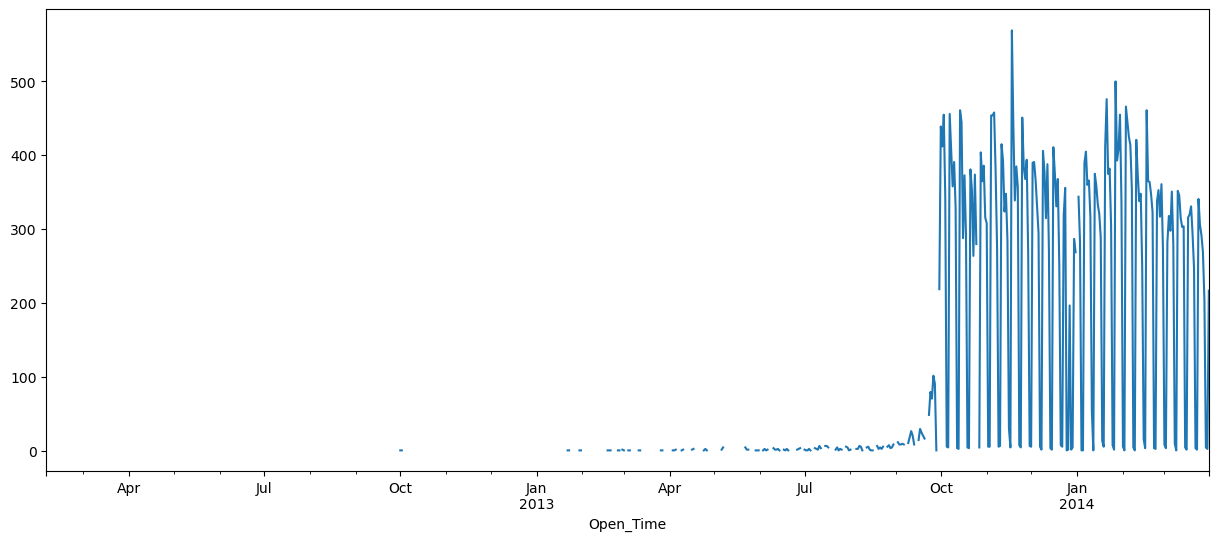

In [81]:
# Plotting number of tickets per day
df2.plot(figsize=(15,6))
plt.show()


In [82]:
# Since not many tickets before October 2013, we consider only the latter values= data2[data2.index > dt.datetime(2013,10,1)]
from13 = data2[data2.index > dt.datetime(2013,10,1)]


In [83]:
from13.head()

,No_Incidents
Open_Time,
2013-10-02,412
2013-10-03,455
2013-10-04,345
2013-10-07,456
2013-10-05,6


In [84]:
# new Series
data3 = from13['No_Incidents']
data3 = data3.asfreq('D')
data3.index


DatetimeIndex(['2013-10-02', '2013-10-03', '2013-10-04', '2013-10-05',
               '2013-10-06', '2013-10-07', '2013-10-08', '2013-10-09',
               '2013-10-10', '2013-10-11',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=181, freq='D')

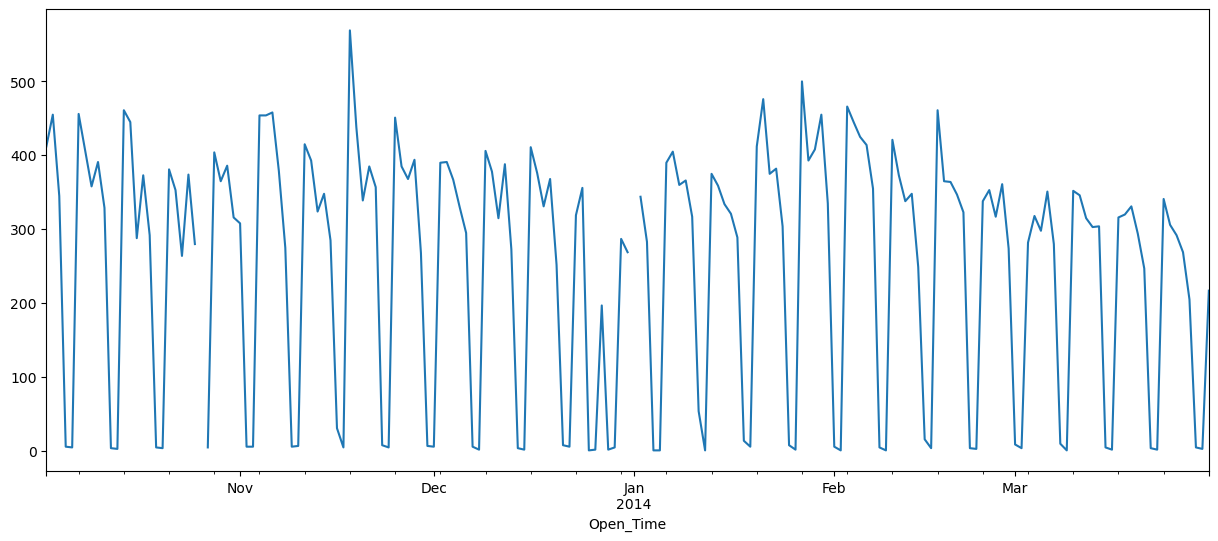

In [85]:
# Plotting number of tickets per day after October 2013
data3.plot(figsize=(15,6))
plt.show()


In [86]:
# Making a list of values for p,d & q
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [87]:
import warnings
warnings.filterwarnings('ignore')

In [88]:
# Checking the AIC values per pairs

for param in pdq:
    mod = sm.tsa.statespace.SARIMAX(data3, order=param, enforce_stationarity=False, enforce_invertibility=False)
    results = mod.fit(disp=False)
    print('ARIMA{} - AIC:{}'.format(param, results.aic))

ARIMA(0, 0, 0) - AIC:2539.6180293605685
ARIMA(0, 0, 1) - AIC:2373.7853824722524
ARIMA(0, 1, 0) - AIC:2371.128960804689
ARIMA(0, 1, 1) - AIC:2313.1363347365786
ARIMA(1, 0, 0) - AIC:2365.291646936565
ARIMA(1, 0, 1) - AIC:2337.312508693354
ARIMA(1, 1, 0) - AIC:2373.128068065154
ARIMA(1, 1, 1) - AIC:2294.4315812436525


In [89]:
# Choosing the model with minimum AIC and the ARIMA Model for Time Series Forecasting

mod = sm.tsa.statespace.SARIMAX(data3, order=(1,1,1))
results = mod.fit()
print(results.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3386      0.090      3.771      0.000       0.163       0.515
ma.L1         -0.9989      0.428     -2.332      0.020      -1.839      -0.159
sigma2       2.52e+04   9781.775      2.576      0.010    6023.428    4.44e+04


In [90]:
# Predicting the future values and the confidence interval
pred = results.get_prediction(start=pd.to_datetime('2014-3-3'),end=pd.to_datetime('2014-10-30'),dynamic=False)
pred_ci = pred.conf_int()
pred.predicted_mean.round()


2014-03-03    172.0
2014-03-04    266.0
2014-03-05    279.0
2014-03-06    272.0
2014-03-07    291.0
              ...  
2014-10-26    252.0
2014-10-27    252.0
2014-10-28    252.0
2014-10-29    252.0
2014-10-30    252.0
Freq: D, Name: predicted_mean, Length: 242, dtype: float64

###### Visualisation

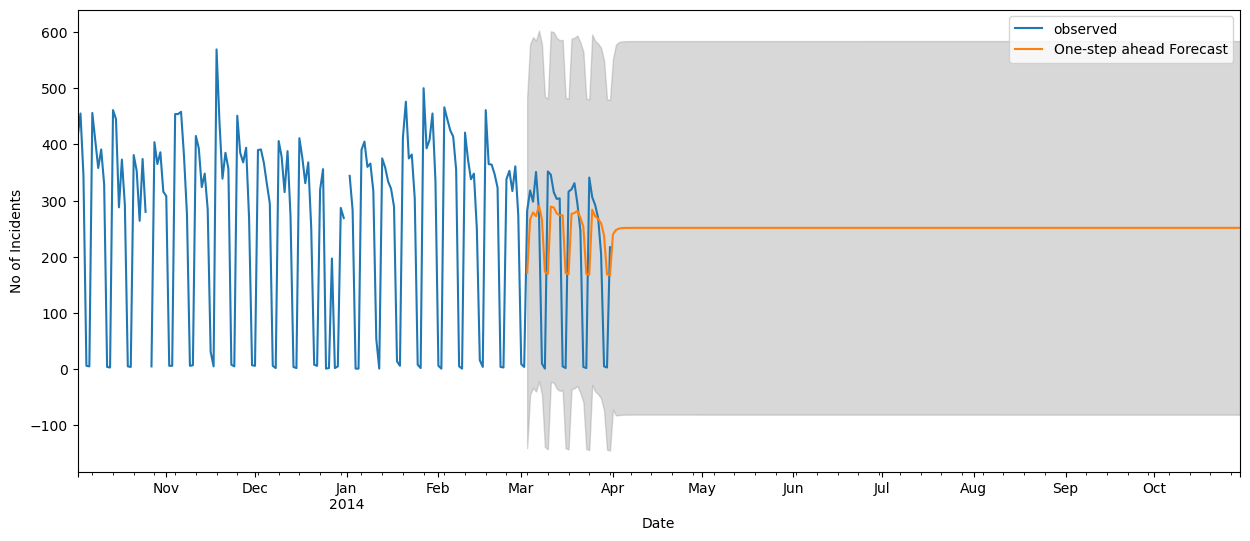

In [91]:
ax = data3['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='One-step ahead Forecast',figsize=(15, 6))
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='grey',alpha=0.3)
ax.set_xlabel('Date')
ax.set_ylabel('No of Incidents')
plt.legend()
plt.show()


-  Volume Forecasting is visualized with the help of Matplotlib throughout the year.
-  By accurately predicting incident volume, the IT team can optimize their workflows, reduce response times, and improve customer satisfaction.
-  Quarterly and annual incident volume forecasts can help the IT team to better plan their staffing levels, training programs, technology investments, and service level agreements (SLAs) with business units. 





## 3. Auto tag the tickets with right priorities and right departments so that reassigning and related delay can be reduced.


In [92]:
list(df.columns)


['CI_Name',
 'CI_Cat',
 'CI_Subcat',
 'WBS',
 'Incident_ID',
 'Status',
 'Impact',
 'Urgency',
 'Priority',
 'number_cnt',
 'Category',
 'KB_number',
 'Alert_Status',
 'No_of_Reassignments',
 'Open_Time',
 'Reopen_Time',
 'Resolved_Time',
 'Close_Time',
 'Handle_Time_hrs',
 'Closure_Code',
 'No_of_Related_Interactions',
 'Related_Interaction',
 'No_of_Related_Incidents',
 'No_of_Related_Changes',
 'Related_Change']

### Feature selection

-  For auto-tagging the tickets these three columns will play crucial roles, so working on them.

In [93]:
data4=df[['CI_Cat','CI_Subcat','Category']]

In [94]:
data4

,CI_Cat,CI_Subcat,Category
0,subapplication,Web Based Application,incident
1,application,Web Based Application,incident
2,application,Desktop Application,request for information
3,application,Web Based Application,incident
4,application,Web Based Application,incident
...,...,...,...
46601,application,Server Based Application,incident
46602,application,Server Based Application,incident
46603,computer,Laptop,incident
46604,application,Web Based Application,incident


In [95]:
data4.isnull().sum()

CI_Cat       0
CI_Subcat    0
Category     0
dtype: int64

In [96]:
data4.CI_Cat.value_counts()

application             32900
subapplication           7782
computer                 3643
storage                   703
hardware                  442
software                  333
database                  214
displaydevice             212
officeelectronics         152
                          111
networkcomponents         107
applicationcomponent        5
Phone                       2
Name: CI_Cat, dtype: int64

### Encoding

In [97]:
le=LabelEncoder()

In [98]:
data4['CI_Subcat']=le.fit_transform(data4['CI_Subcat'])
data4['Category']=le.fit_transform(data4['Category'])

In [99]:
data4.replace({'CI_Cat':{'applicationcomponent':'computer',
                           'displaydevice':'hardware',
                           'officeelectronics':'hardware',
                           'networkcomponents':'hardware',
                           'Phone':'hardware',
                           'database':'storage',
                           '':'application',
                           }
                 },
                 inplace=True
                )


In [100]:
data4

,CI_Cat,CI_Subcat,Category
0,subapplication,58,1
1,application,58,1
2,application,11,3
3,application,58,1
4,application,58,1
...,...,...,...
46601,application,46,1
46602,application,46,1
46603,computer,22,1
46604,application,58,1


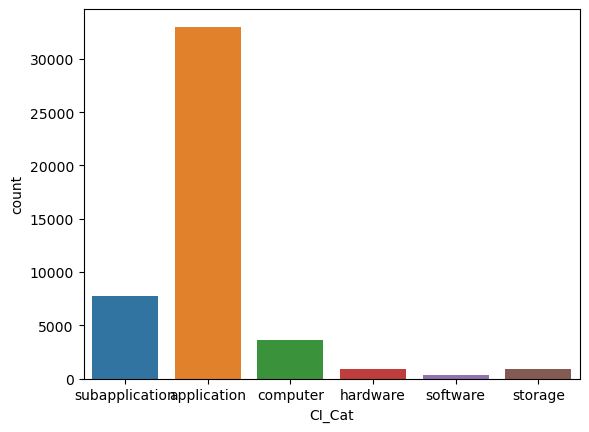

In [101]:
sns.countplot(data4.CI_Cat)
plt.show()


In [102]:
X = data4.drop(['CI_Cat'],axis=1)
Y = data4['CI_Cat']
print(X.shape,Y.shape)

(46606, 2) (46606,)


In [103]:
pd.DataFrame(Y.replace({'application':0,'subapplication':1,'computer':2,'storage':3,'hardware':4,'software':5},inplace=True))


""


In [104]:
Y.head()

0    1
1    0
2    0
3    0
4    0
Name: CI_Cat, dtype: int64

#### Splitting

In [105]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=100)

print(X_train.shape,X_test.shape)


(37284, 2) (9322, 2)


#### SMOTE

In [106]:
oversample = SMOTE(random_state=42)
X_train_over,Y_train_over = oversample.fit_resample(X_train,Y_train)


In [107]:
Y_train_over.value_counts()


0    26372
2    26372
1    26372
5    26372
3    26372
4    26372
Name: CI_Cat, dtype: int64

### Modelling

###### Logistic Regression

In [108]:
lr= LogisticRegression()
#training the model
lr.fit(X_train_over,Y_train_over)
#predicting
y_lr= lr.predict(X_test)

print('Accuracy_score -',accuracy_score(Y_test,y_lr))
lr_acc = accuracy_score(Y_test,y_lr)

print('classificationreport-\n',classification_report(Y_test,y_lr))

print(confusion_matrix(Y_test,y_lr))

Accuracy_score - 0.3567903883286848
classificationreport-
               precision    recall  f1-score   support

           0       0.86      0.22      0.35      6639
           1       0.40      0.80      0.53      1544
           2       0.36      0.89      0.51       703
           3       0.02      0.01      0.01       187
           4       0.06      0.04      0.05       180
           5       0.00      0.00      0.00        69

    accuracy                           0.36      9322
   macro avg       0.28      0.33      0.24      9322
weighted avg       0.71      0.36      0.38      9322

[[1462 1728  915    0  103 2431]
 [ 213 1230   32    0    0   69]
 [   4   36  626    0   17   20]
 [   9    1   78    1    0   98]
 [  13    5   76   50    7   29]
 [   4   55   10    0    0    0]]


##### Decision Tree

In [109]:
tree = DecisionTreeClassifier()

# Fit the model to the training data
tree.fit(X_train_over,Y_train_over)

# Make predictions on the test data
y_pred_tree= tree.predict(X_test)

print('Accuracy_score -',accuracy_score(Y_test,y_pred_tree))
tree_acc = accuracy_score(Y_test,y_pred_tree)

print(classification_report(Y_test, y_pred_tree))
print(confusion_matrix(Y_test,y_pred_tree))

Accuracy_score - 0.7799828363012229
              precision    recall  f1-score   support

           0       0.94      0.74      0.83      6639
           1       0.42      0.79      0.55      1544
           2       1.00      1.00      1.00       703
           3       0.99      0.99      0.99       187
           4       0.95      0.99      0.97       180
           5       0.99      1.00      0.99        69

    accuracy                           0.78      9322
   macro avg       0.88      0.92      0.89      9322
weighted avg       0.86      0.78      0.80      9322

[[4913 1718    0    0    7    1]
 [ 320 1224    0    0    0    0]
 [   1    0  700    0    2    0]
 [   0    0    0  186    1    0]
 [   0    0    0    1  179    0]
 [   0    0    0    0    0   69]]


##### Random forest classifier

In [110]:
#instantiating object
rf = RandomForestClassifier()

#fitting the model
rf.fit(X_train_over,Y_train_over)

#predicting
y_pred_rf= rf.predict(X_test)

print('Accuracy_score -',accuracy_score(Y_test,y_pred_rf))
rf_acc = accuracy_score(Y_test,y_pred_rf)

print(classification_report(Y_test, y_pred_rf))
print(confusion_matrix(Y_test,y_pred_rf))

Accuracy_score - 0.7799828363012229
              precision    recall  f1-score   support

           0       0.94      0.74      0.83      6639
           1       0.42      0.79      0.55      1544
           2       1.00      1.00      1.00       703
           3       0.99      0.99      0.99       187
           4       0.95      0.99      0.97       180
           5       0.99      1.00      0.99        69

    accuracy                           0.78      9322
   macro avg       0.88      0.92      0.89      9322
weighted avg       0.86      0.78      0.80      9322

[[4913 1718    0    0    7    1]
 [ 320 1224    0    0    0    0]
 [   1    0  700    0    2    0]
 [   0    0    0  186    1    0]
 [   0    0    0    1  179    0]
 [   0    0    0    0    0   69]]


##### Ada boost Classifier

In [111]:
#instantiating the object
ada_boost= AdaBoostClassifier()

#fitting the model
ada_boost.fit(X_train_over,Y_train_over)

#predicting
y_pred_ada=ada_boost.predict(X_test)

print('Accuracy_score -',accuracy_score(Y_test,y_pred_ada))
ada_acc = accuracy_score(Y_test,y_pred_ada)

print(classification_report(Y_test, y_pred_ada))
print(confusion_matrix(Y_test,y_pred_ada))

Accuracy_score - 0.7076807552027462
              precision    recall  f1-score   support

           0       0.77      0.88      0.82      6639
           1       0.00      0.00      0.00      1544
           2       0.38      0.63      0.47       703
           3       0.92      0.53      0.67       187
           4       0.49      0.89      0.63       180
           5       0.60      0.99      0.74        69

    accuracy                           0.71      9322
   macro avg       0.52      0.65      0.56      9322
weighted avg       0.61      0.71      0.65      9322

[[5824    0  727    0   56   32]
 [1538    0    0    0    0    6]
 [ 222    0  445    9   26    1]
 [   0    0    0   99   87    1]
 [   0    0   13    0  161    6]
 [   0    0    0    0    1   68]]


##### XG Boost classifier

In [112]:
#instantiating the object
xgboost= XGBClassifier()

#fitting the model
xgboost.fit(X_train_over,Y_train_over)

#predicting
y_pred_xg= xgboost.predict(X_test)


print('Accuracy_score -',accuracy_score(Y_test,y_pred_xg))
xg_acc = accuracy_score(Y_test,y_pred_xg)

print(classification_report(Y_test, y_pred_xg))

print(confusion_matrix(Y_test,y_pred_xg))

Accuracy_score - 0.7799828363012229
              precision    recall  f1-score   support

           0       0.94      0.74      0.83      6639
           1       0.42      0.79      0.55      1544
           2       1.00      1.00      1.00       703
           3       0.99      0.99      0.99       187
           4       0.95      0.99      0.97       180
           5       0.97      1.00      0.99        69

    accuracy                           0.78      9322
   macro avg       0.88      0.92      0.89      9322
weighted avg       0.86      0.78      0.80      9322

[[4913 1718    0    0    7    1]
 [ 320 1224    0    0    0    0]
 [   0    0  700    0    2    1]
 [   0    0    0  186    1    0]
 [   0    0    0    1  179    0]
 [   0    0    0    0    0   69]]


In [113]:
models = pd.DataFrame({'Accuracy':[lr_acc, tree_acc, rf_acc, ada_acc, xg_acc]},
                       
                      index=['Logistic Regression','Decision Tree','Random Forest','Ada Boost ','XG Boost'],
                      columns=['Accuracy'])
models

,Accuracy
Logistic Regression,0.356790
Decision Tree,0.779983
Random Forest,0.779983
Ada Boost,0.707681
XG Boost,0.779983


-  An accuracy of 77% with a random forest model means that the model correctly predicted the right priorities and departments for 77% of the tickets in the dataset. This is a measure of the model's overall performance in correctly classifying the data.



## 4.Predict RFC (Request for change) and possible failure / misconfiguration of ITSM assets.


##### The exact columns that indicate RFC may depend on the specific data format  used in the ITSM system.We dont find possible information that predict RFC accurately.


-  Predicting Request for Change (RFC): The predictor variables are Category, CI Subcategory, WBS, Priority, Number of Related Interaction, Number of Related Incidents


In [116]:
df

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,incident,KM0000553,closed,26,05-02-2012 13:32,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,incident,KM0000611,closed,33,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,request for information,KM0000339,closed,3,29-03-2012 12:36,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,incident,KM0000611,closed,13,17-07-2012 11:49,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,incident,KM0000611,closed,2,10-08-2012 11:01,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4,0.23189604,incident,KM0001314,closed,0,31-03-2014 16:23,,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1,SD0147021,,,
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4,0.805153085,incident,KM0002360,closed,0,31-03-2014 15:03,,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1,SD0146967,,,
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5,0.917466294,incident,KM0000315,closed,0,31-03-2014 15:28,,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1,SD0146982,,,
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4,0.701278158,incident,KM0001287,closed,0,31-03-2014 15:35,,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1,SD0146986,,,


#### Feature selection

In [117]:
data5=df[['Category','CI_Subcat','WBS','Priority','No_of_Related_Interactions','No_of_Related_Incidents','No_of_Related_Changes']]

#### Encoding

In [118]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data5['CI_Subcat']=le.fit_transform(data5['CI_Subcat'])
data5['WBS']=le.fit_transform(data5['WBS'])
data5['Priority']=le.fit_transform(data5['Priority'])
data5['Category']=le.fit_transform(data5['Category'])
data5['No_of_Related_Changes']=le.fit_transform(data5['No_of_Related_Changes'])
data5['No_of_Related_Interactions']=le.fit_transform(data5['No_of_Related_Interactions'])
data5['No_of_Related_Incidents']=le.fit_transform(data5['No_of_Related_Incidents'])


In [119]:
data5.head()

,Category,CI_Subcat,WBS,Priority,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,1,58,137,3,1,10,0
1,1,58,70,2,1,1,0
2,3,11,74,5,1,0,0
3,1,58,70,3,1,0,0
4,1,58,70,3,1,0,0


In [120]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Category                    46606 non-null  int32
 1   CI_Subcat                   46606 non-null  int32
 2   WBS                         46606 non-null  int32
 3   Priority                    46606 non-null  int32
 4   No_of_Related_Interactions  46606 non-null  int32
 5   No_of_Related_Incidents     46606 non-null  int32
 6   No_of_Related_Changes       46606 non-null  int32
dtypes: int32(7)
memory usage: 1.2 MB


In [121]:
data5.isnull().sum()

Category                      0
CI_Subcat                     0
WBS                           0
Priority                      0
No_of_Related_Interactions    0
No_of_Related_Incidents       0
No_of_Related_Changes         0
dtype: int64

In [122]:
# Selecting the predictors
X = data5.loc[:,['CI_Subcat','WBS','Priority','Category','No_of_Related_Interactions','No_of_Related_Incidents']]
y = data5.No_of_Related_Changes


In [123]:
data5

,Category,CI_Subcat,WBS,Priority,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,1,58,137,3,1,10,0
1,1,58,70,2,1,1,0
2,3,11,74,5,1,0,0
3,1,58,70,3,1,0,0
4,1,58,70,3,1,0,0
...,...,...,...,...,...,...,...
46601,1,46,59,3,1,0,0
46602,1,46,59,3,1,0,0
46603,1,22,73,4,1,0,0
46604,1,58,59,3,1,0,0


##### Splitting

In [124]:
# Splitting into train and test for calculating the accuracy
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)


##### Scaling

In [125]:
# Standardization technique is used
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


#### Modelling

#### Decision Tree

In [126]:
# Training the model
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

predict_dtree = dtree.predict(X_test)
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,predict_dtree))
d_acc = accuracy_score(y_test,predict_dtree)

print(classification_report(y_test,predict_dtree))


0.9884136747246459
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13835
           1       0.23      0.04      0.07       138
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         1

    accuracy                           0.99     13982
   macro avg       0.31      0.26      0.27     13982
weighted avg       0.98      0.99      0.98     13982



##### Random Forest

In [127]:
# Training the model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

# Predicting the model
predict_rf = rf.predict(X_test)

# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,predict_rf))
r_acc = accuracy_score(y_test,predict_rf)

print(classification_report(y_test,predict_rf))


0.9886282363038192
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13835
           1       0.18      0.02      0.04       138
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         1

    accuracy                           0.99     13982
   macro avg       0.29      0.26      0.26     13982
weighted avg       0.98      0.99      0.98     13982



##### XG Boost

In [128]:
# Training the model
xgboost= XGBClassifier()
xgboost.fit(X_train,y_train)

# Predicting the model
predict_xg = xgboost.predict(X_test)

# Finding accuracy 
print(accuracy_score(y_test,predict_xg))
x_acc = accuracy_score(y_test,predict_xg)

print(classification_report(y_test,predict_xg))


0.9892004005149478
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13835
           1       0.33      0.03      0.05       138
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         1

    accuracy                           0.99     13982
   macro avg       0.33      0.26      0.26     13982
weighted avg       0.98      0.99      0.98     13982



##### Logistic Regression

In [129]:
lr= LogisticRegression()
#training the model
lr.fit(X_train,y_train)
#predicting
y_pred= lr.predict(X_test)

print('Accuracy_score -',accuracy_score(y_test,y_pred))
lr_acc = accuracy_score(y_test,y_pred)

print('classificationreport-\n',classification_report(y_test, y_pred))



Accuracy_score - 0.9894864826205121
classificationreport-
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     13835
           1       0.00      0.00      0.00       138
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         1

    accuracy                           0.99     13982
   macro avg       0.25      0.25      0.25     13982
weighted avg       0.98      0.99      0.98     13982



In [130]:
models = pd.DataFrame({'Accuracy':[d_acc, r_acc, x_acc, lr_acc]},
                       
                      index=['Decision Tree','Random Forest','XG Boost','Logistic Regression'],
                      columns=['Accuracy'])
models

,Accuracy
Decision Tree,0.988414
Random Forest,0.988628
XG Boost,0.989200
Logistic Regression,0.989486


### Hyperparameter Tuning

In [132]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.0001,0.001,0.001,0.01,0.1],
              'learning_rate': [0.001,0.01,0.1,0.35,0.4,0.45,0.5],
              'n_estimators': [90,95,100,110,115,130,120],
              'reg_alpha': [0.1,0.001,0.0001,0.3,0.35,0.25,0.4,1.5,1.0],
              'reg_lambda': [0.1,0.001,0.0001,0.3,0.35,0.25,0.4,1.5,1.0]}

XGB=XGBClassifier(random_state=42)
rcv= RandomizedSearchCV(estimator=XGB, scoring='f1',param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
rcv.fit(X_train,y_train)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters 
print(f"Best paramters: {cv_best_params})")##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 0.0001, 'reg_alpha': 0.1, 'n_estimators': 130, 'learning_rate': 0.5, 'gamma': 0.1})


In [133]:
XGB2=XGBClassifier(reg_lambda= 0.0001, reg_alpha= 0.1, n_estimators=130, learning_rate=0.5, gamma=0.1)
XGB2.fit(X_train,y_train)#training 
y_predict=XGB2.predict(X_test)#testing


In [134]:
acc = accuracy_score(y_test,y_predict)
acc

0.9892719210413389

### CONCLUSION

-  Predicting High Priority Tickets: By predicting priority 1 & 2 tickets, ITSM teams can take preventive measures or fix the problem before it surfaces. This can help reduce the impact of high priority incidents on business operations and improve customer satisfaction. 



-  Forecast the Incident Volume in Different Fields: By forecasting incident volume in different fields quarterly and annually, ITSM teams can better prepare for resources and technology planning. This can help optimize staffing levels, training programs, technology investments, and service level agreements with business units. 


-  Auto Tagging Tickets with Right Priorities and Departments: By auto tagging tickets with the right priorities and departments, ITSM teams can reduce reassigning and related delays. This can help improve incident management efficiency and reduce response times. 
    


-  Predict RFC and Possible Failure/Misconfiguration of ITSM Assets: By predicting RFC and possible failure/misconfiguration of ITSM assets, ITSM teams can proactively manage the IT assets and avoid potential issues before they escalate. This can help reduce incident volume and improve asset performance.  




